In [50]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
data=pd.read_csv('Scholarship.csv')

In [52]:
df=data.copy()

In [53]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [54]:
df.shape

(1000, 3)

C:\Users\gpras\AppData\Local\Temp\ipykernel_9456\1737763189.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['semester_percentage'])
C:\Users\gpras\AppData\Local\Temp\ipykernel_9456\1737763189.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_marks'])


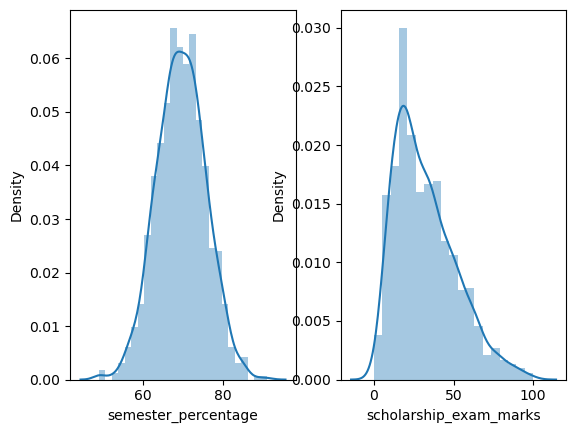

In [55]:
plt.subplot(1,2,1)
sns.distplot(df['semester_percentage'])
plt.subplot(1,2,2)
sns.distplot(df['scholarship_exam_marks'])
plt.show()

In [56]:
mean=df['semester_percentage'].mean()
std=df['semester_percentage'].std()

In [57]:
mean,std

(69.6124, 6.158978751323897)

In [58]:
Highest_allowed=mean+3*std
Lowest_allowed=mean-3*std

In [59]:
Highest_allowed,Lowest_allowed

(88.08933625397168, 51.13546374602831)

In [60]:
df[df['semester_percentage']>Highest_allowed]

,semester_percentage,scholarship_exam_marks,got_scholarship
995,88.7,44,1
996,91.2,65,1


In [61]:
df[df['semester_percentage']<Lowest_allowed]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
997,48.9,34,0
999,49.0,10,1


In [62]:
df[(df['semester_percentage']<Lowest_allowed) | (df['semester_percentage']>Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


# Trimming 

In [63]:
df[(df['semester_percentage']>Lowest_allowed) & (df['semester_percentage']<Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [64]:
df['z_score']=(df['semester_percentage']-df['semester_percentage'].mean())/df['semester_percentage'].std()

In [65]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


In [66]:
df[df['z_score']>3] 

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062


In [67]:
df[df['z_score']<-3]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


Outliers using z_score

In [68]:
df[(df['z_score']<-3) | (df['z_score']>3) ]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


Trimming

In [69]:
df[(df['z_score']>-3) & (df['z_score']<3) ]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


# capping

we are not deleting the ouliers we are taking the outlier to std valued

In [70]:
upper_limit = mean+ 3*std
lower_limit = mean-3*std

In [71]:
upper_limit,lower_limit

(88.08933625397168, 51.13546374602831)

np.where(con , t(value),f(value))

In [72]:
df['semester_percentage']=np.where(df['semester_percentage']>upper_limit,upper_limit,df['semester_percentage'])

In [73]:
df[(df['semester_percentage']<Lowest_allowed) | (df['semester_percentage']>Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [74]:
df['semester_percentage']=np.where(df['semester_percentage']<lower_limit,lower_limit,df['semester_percentage'])

In [75]:
df[(df['semester_percentage']<Lowest_allowed) | (df['semester_percentage']>Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score


In [76]:
df[(df['semester_percentage']<Lowest_allowed) | (df['semester_percentage']>Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score


In [77]:
df['semester_percentage']=np.where(df['semester_percentage']>upper_limit,upper_limit,np.where(df['semester_percentage']<lower_limit,lower_limit,df['semester_percentage']))

In [78]:
df[(df['semester_percentage']<Lowest_allowed) | (df['semester_percentage']>Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score


In [79]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239
